# PROBABILITY AND STATISTICS (SUPPLEMENTARY RESOURCE)
**Dr. Ömer Gökdaş**

---

# CHAPTER 1: INTRODUCTION TO STATISTICS AND DATA SUMMARIZATION
**(Week 1-2: Lecture Notes)**

## 1. INTRODUCTION: WHY STATISTICS?
No process in engineering or nature is 100% stable. The diameter of screws from the same factory, the strength of the same concrete mix, or the response time of the same circuit will always show variability.

**The Task of Statistics:** To extract a meaningful "model" from a chaotic-looking, variable pile of data and to make decisions about the future.

### 1.1. Basic Definitions (Population vs. Sample)
This distinction is critical. The **(n-1)** difference in formulas comes from here.


*   **Population (Anakütle):** The entire group we are interested in.
    *   *Symbols:* Size $N$, Mean $\mu$ (mu), Standard Deviation $\sigma$ (sigma).
    *   *Example:* All voters in a country (60 Million people).

*   **Sample (Örneklem):** A smaller group selected randomly to represent the population.
    *   *Symbols:* Size $n$, Mean $\bar{x}$, Standard Deviation $s$.
    *   *Example:* 2000 people surveyed.

> **Correct Analogy (Election Poll):** Everyone's opinion in a country is not the same (Heterogeneous). Asking 60 million people one by one is impossible and expensive. Therefore, we ask a random **Sample** of 2000 people. If these 2000 people are chosen correctly, we can predict the trend of the entire country with a small margin of error. Statistics is the art of managing this "margin of error".


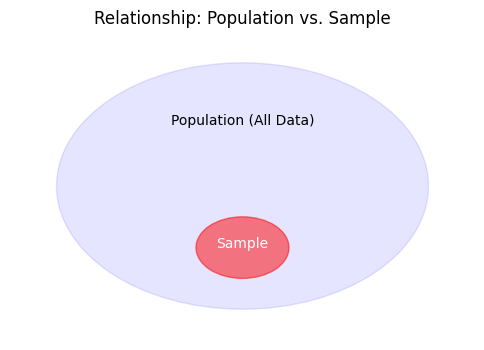

In [ ]:
# Visual: Taking a small Sample from a large Population
import matplotlib.pyplot as plt

# Visual Concept: Population vs Sample
plt.figure(figsize=(6, 4))
circle1 = plt.Circle((0.5, 0.5), 0.4, color='blue', alpha=0.1, label='Population (N)')
circle2 = plt.Circle((0.5, 0.3), 0.1, color='red', alpha=0.5, label='Sample (n)')

plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)

plt.text(0.5, 0.7, "Population (All Data)", ha='center')
plt.text(0.5, 0.3, "Sample", ha='center', color='white')
plt.title("Relationship: Population vs. Sample")
plt.axis('off')
plt.show()


## 2. DATA TYPES AND SCALES
You must know the type of data before analyzing it. (e.g., You cannot take the average of "Phone Brands").

### 2.1. Qualitative (Categorical) Data
Data that has no numerical value, only labels.
*   **Nominal:** No order. Just names. (e.g., Car Color: Red, Blue; Material Type: Steel, Wood).
*   **Ordinal:** There is an order, but the difference is not mathematical. (e.g., Customer Satisfaction: Bad < Average < Good).

### 2.2. Quantitative (Numerical) Data - Engineering Data
Data on which mathematical operations can be performed.
*   **Discrete:** Countable data, cannot have decimals. (e.g., Number of columns in a building, number of defective items).
*   **Continuous:** Data that can take decimal values depending on the precision of the measurement tool. (e.g., Concrete compressive strength 30.5 MPa, Voltage, Temperature).


## 3. DATA VISUALIZATION
You cannot interpret a list of thousands of numbers just by looking at them. We need to see the "shape" of the data.

### 3.1. Histogram (The Most Important Graph)
Shows the distribution of continuous data. Data is divided into intervals (bins) and a bar chart is drawn.
*   **Where is the Center?** Around which value is the data clustered?
*   **How is the Spread?** Is the data very scattered, or does it form a sharp peak?
*   **Symmetry:** Is it symmetric like a Bell Curve? Or is it leaning right/left (Skewed)?


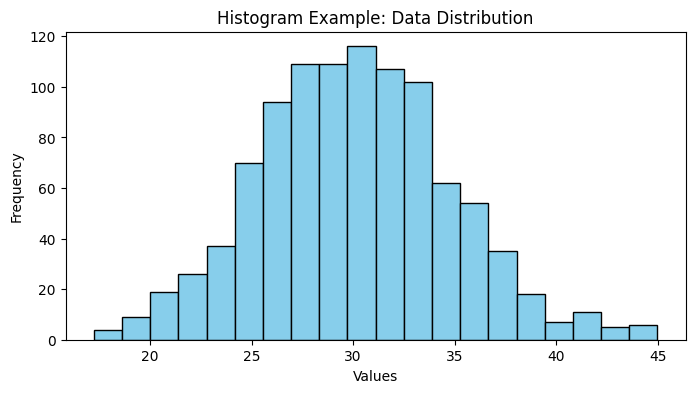

In [ ]:
# Code: Histogram of random data
import numpy as np
import matplotlib.pyplot as plt

# Generating random data (Concrete strength simulation)
data = np.random.randn(1000) * 5 + 30  # Mean: 30, Std Dev: 5

plt.figure(figsize=(8, 4))
plt.hist(data, bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram Example: Data Distribution")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()


### 3.2. Box Plot
It is the summary skeleton of the data. It is especially used to catch **Outliers**. It shows 5 Points:
1. Minimum
2. Q1 (First Quartile)
3. Median (Exact middle point)
4. Q3 (Third Quartile)
5. Maximum


## 4. MEASURES OF CENTRAL TENDENCY (AVERAGES)
If we want to select a single number to represent the dataset, what do we use?

### 4.1. Arithmetic Mean
The most common measure. Formula: $\bar{x} = \frac{\sum x}{n}$
*   **Weakness:** The mean is very badly affected by Outliers.

### 4.2. Median
The number exactly in the middle when data is sorted small to large. It is NOT affected by outliers.

### 4.3. Mode
The most frequent number.

**Example Scenario:** A group of 5 interns has a monthly income of 10,000 TL. If a CEO (salary 1,000,000 TL) enters the room, the "Average Income" of the room suddenly jumps to 175,000 TL. This number does not reflect the reality of the room. (The Median remains unchanged).


In [ ]:
# Code: How outliers ruin the Mean
import numpy as np

salaries = [10000, 10000, 10000, 10000, 10000]
print("Initial State (Only Interns):")
print("Mean:   ", np.mean(salaries))
print("Median: ", np.median(salaries))

# CEO Enters
salaries.append(1000000)
print("\nAfter CEO Enters:")
print("Mean:   ", np.mean(salaries), " -> (Heavily distorted)")
print("Median: ", np.median(salaries), " -> (Unchanged, still represents the group)")


Initial State (Only Interns):
Mean:    10000.0
Median:  10000.0

After CEO Enters:
Mean:    175000.0  -> (Heavily distorted)
Median:  10000.0  -> (Unchanged, still represents the group)


## 5. MEASURES OF DISPERSION (SPREAD)
In engineering, how much the data scatters (fluctuates) is as important as the average.

### 5.1. Variance
The average of the squared differences from the mean.
*   **Population Variance ($\sigma^2$):** Divide by $N$.
*   **Sample Variance ($s^2$):** Divide by $(n-1)$. (Bessel's Correction).
*   **Why (n-1)?** A sample usually misses the extreme values of the population. To correct this bias and slightly "inflate" the variance, we decrease the denominator.

### 5.2. Standard Deviation
The square root of the variance ($s = \sqrt{Variance}$). It is in the same unit as the data. It tells us "how much we deviate from the average".

### 5.3. Coefficient of Variation (CV)
Used to compare different units. $CV = (s / \bar{x}) * 100$.


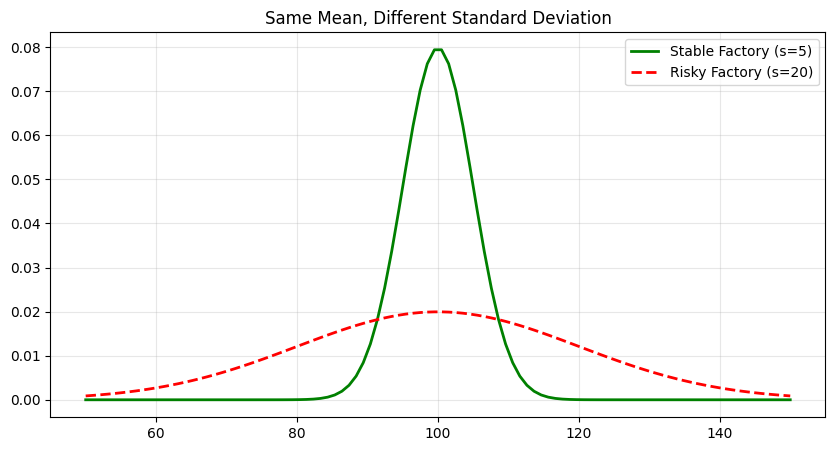

In [ ]:
# Code: Visualizing Dispersion (Pure Python Math)
import numpy as np
import matplotlib.pyplot as plt

# Mathematical Normal Distribution Formula (No Scipy needed)
def normal_dist_formula(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

x_axis = np.linspace(50, 150, 100)

# Two different factories: Same Mean (100) but different Spread
y_stable = normal_dist_formula(x_axis, 100, 5)   # Low spread (s=5)
y_risky  = normal_dist_formula(x_axis, 100, 20)  # High spread (s=20)

plt.figure(figsize=(10, 5))
plt.plot(x_axis, y_stable, label='Stable Factory (s=5)', color='green', linewidth=2)
plt.plot(x_axis, y_risky, label='Risky Factory (s=20)', color='red', linestyle='--', linewidth=2)
plt.title("Same Mean, Different Standard Deviation")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## 6. STEP-BY-STEP CALCULATION EXAMPLE

**Data:** `[ 10, 12, 15, 11, 12 ]`
**Question:** Calculate the Sample Variance ($s^2$) and Standard Deviation ($s$).

### Solution (Manual Steps):
**STEP 1:** Find the Mean ($\bar{x}$).
Sum = 60, Count (n) = 5
$\bar{x} = 60 / 5 = 12$

**STEP 2:** Find Squared Differences from the Mean.
*   $(10 - 12)^2 = (-2)^2 = 4$
*   $(12 - 12)^2 = (0)^2 = 0$
*   $(15 - 12)^2 = (3)^2 = 9$
*   $(11 - 12)^2 = (-1)^2 = 1$
*   $(12 - 12)^2 = (0)^2 = 0$

**STEP 3:** Sum the Squares.
Sum of Squares = $4 + 0 + 9 + 1 + 0 = 14$

**STEP 4:** Calculate Variance (n-1 Rule).
Since it is a sample, we divide by 4, not 5.
$s^2 = 14 / 4 = 3.5$

**STEP 5:** Standard Deviation.
$s = \sqrt{3.5} \approx 1.87$

**Interpretation:** The data is clustered around 12 with an average deviation (fluctuation) of 1.87 units.

---
### Verification with Python Code:



In [ ]:
# Code: Verifying the manual solution
data_ex = [10, 12, 15, 11, 12]
n = len(data_ex)

# 1. Mean
mean_val = sum(data_ex) / n
print(f"Mean: {mean_val}")

# 2. Sum of Squared Differences
sum_sq = 0
for x in data_ex:
    sum_sq += (x - mean_val) ** 2

print(f"Sum of Squares: {sum_sq}")

# 3. Variance (n-1)
variance = sum_sq / (n - 1)
print(f"Variance (s^2): {variance}")

# 4. Standard Deviation
std_dev = variance ** 0.5
print(f"Standard Deviation (s): {std_dev:.2f}")


Mean: 12.0
Sum of Squares: 14.0
Variance (s^2): 3.5
Standard Deviation (s): 1.87


## 7. QUARTILES AND BOX PLOT
To draw a box plot, we need boundaries that divide the data into 4 equal parts (Quartiles).

### 7.1. Calculating Quartiles and IQR
**Example Data:** `[ 2, 4, 6, 8, 10, 12, 14 ]` (7 numbers)

### Solution (Manual Steps):
1.  **Median:** The exact middle number is **8**.
2.  **Lower Group (Left Side):** `[ 2, 4, 6 ]` -> The middle of this group (Q1) = **4**
3.  **Upper Group (Right Side):** `[ 10, 12, 14 ]` -> The middle of this group (Q3) = **12**
4.  **IQR (Interquartile Range):** $Q3 - Q1 = 12 - 4 = 8$

**Interpretation:** The middle 50% of the data (between 4 and 12) is spread over a range of 8 units.

---
### Verification with Python Code:



Median: 8
Q1 (First Quartile): 4
Q3 (Third Quartile): 12
IQR: 8


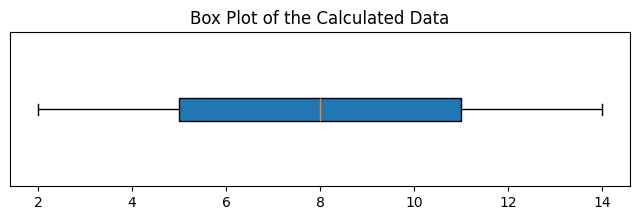

In [ ]:
# Code: Quartile calculation and plot
data_q = [2, 4, 6, 8, 10, 12, 14]

# Median
med_index = len(data_q) // 2
median_val = data_q[med_index]

# Splitting Groups
lower_group = data_q[:med_index]
upper_group = data_q[med_index+1:]

# Quartiles
q1 = lower_group[len(lower_group)//2]
q3 = upper_group[len(upper_group)//2]
iqr = q3 - q1

print(f"Median: {median_val}")
print(f"Q1 (First Quartile): {q1}")
print(f"Q3 (Third Quartile): {q3}")
print(f"IQR: {iqr}")

# Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 2))
plt.boxplot(data_q, vert=False, patch_artist=True)
plt.title("Box Plot of the Calculated Data")
plt.yticks([])
plt.show()


## 8. Lecture Summary
*   **Mean vs Median:** If there are outliers (extreme values), Mean is misleading. Use Median.
*   **Unit of Variance:** Variance is in squared units ($kg^2$). It has no physical meaning; always take the square root (Standard Deviation) for interpretation.
*   **n vs n-1:** If the question says "All factory data", divide by $n$. If it says "Selected 10 samples", divide by $(n-1)$. (In class, it's 99% likely to be $n-1$).
*   **The 'Rule of 30' Myth:** Even if the sample size is 1 million, the formula denominator is always $(n-1)$ for sample variance. It does not change based on size.
